In [34]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import numpy as np

In [2]:
stroke = r'C:\Users\emjcr\Desktop\Butler Homework\Project_3\healthcare-dataset-stroke-data.csv'

In [3]:
df = pd.read_csv(stroke)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [5]:
clean_df = df.dropna()
clean_df.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [6]:
clean_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
count = clean_df['id'].nunique()
count

4909

In [8]:
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB
None


In [9]:
work = clean_df.groupby('work_type')['age'].count()
work

work_type
Govt_job          630
Never_worked       22
Private          2811
Self-employed     775
children          671
Name: age, dtype: int64

In [10]:
filterChildren = clean_df[clean_df.work_type != "children"]
filterChildren

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
filt= clean_df[clean_df.age > 16]
filt

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [57]:
filt2 = filt[filt.gender != 'Other']
filt2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [62]:
filt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4130 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4130 non-null   int64  
 1   gender             4130 non-null   object 
 2   age                4130 non-null   float64
 3   hypertension       4130 non-null   int64  
 4   heart_disease      4130 non-null   int64  
 5   ever_married       4130 non-null   object 
 6   work_type          4130 non-null   object 
 7   Residence_type     4130 non-null   object 
 8   avg_glucose_level  4130 non-null   float64
 9   bmi                4130 non-null   float64
 10  smoking_status     4130 non-null   object 
 11  stroke             4130 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 419.5+ KB


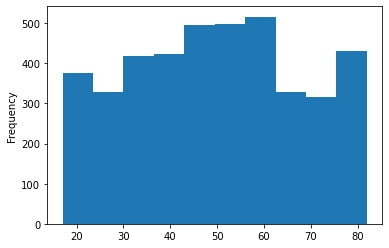

In [16]:
filt.age.plot.hist();

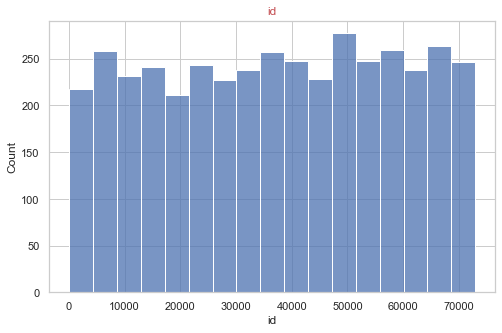

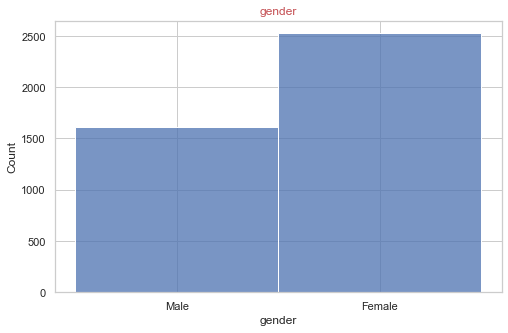

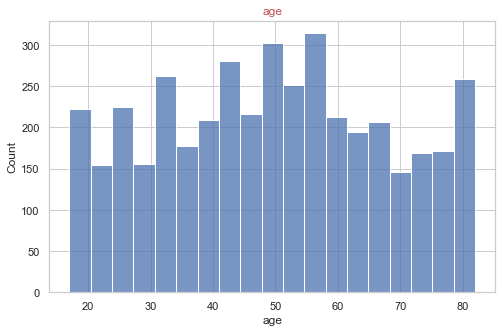

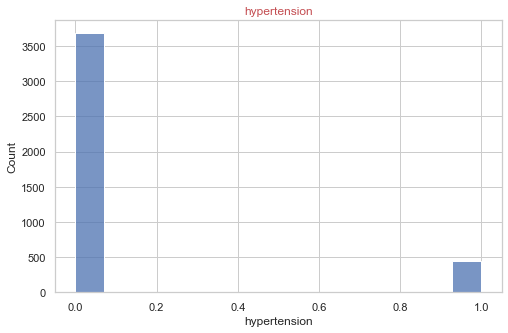

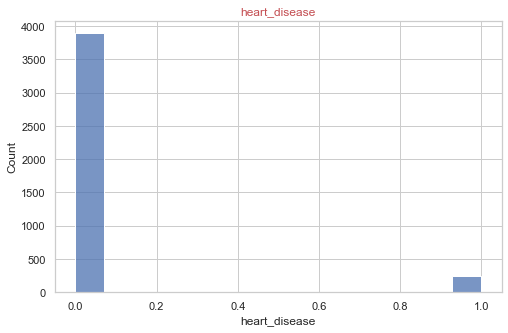

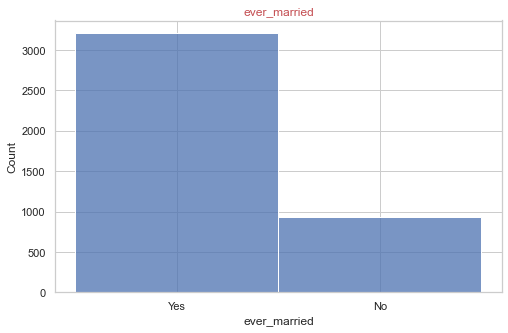

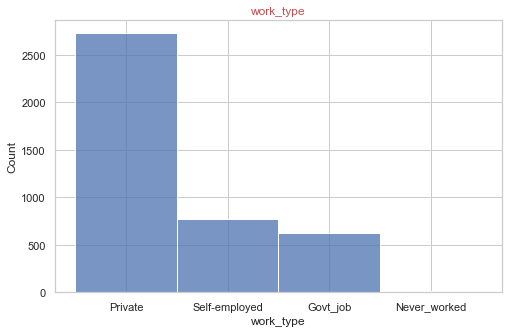

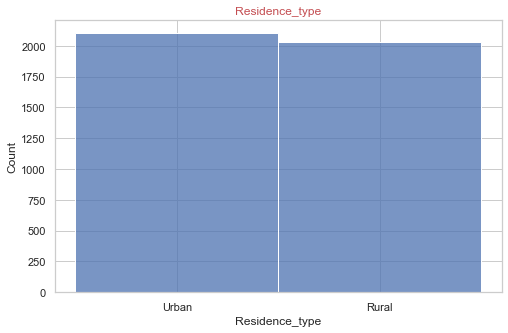

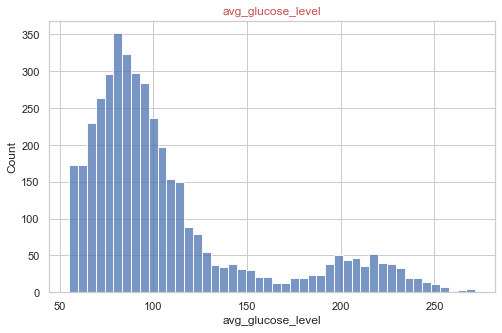

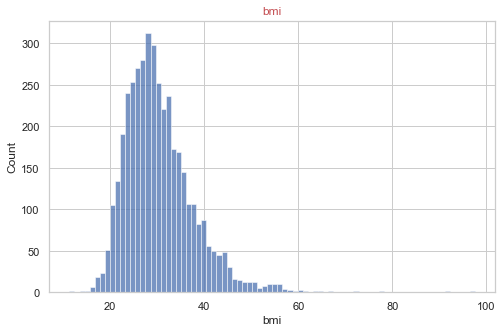

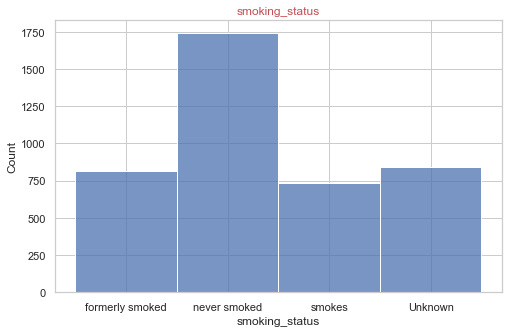

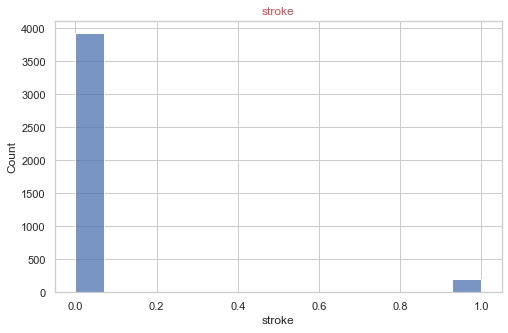

In [63]:
# Check the distribution of the age, hypertension,heart_disease,av_glucose_level, bmi and stroke columns with a histogram
for i in filt2:    
    fig = plt.figure(figsize=(8,5))
    sns.histplot(filt2[i], palette="pastel")
    plt.title(i,fontsize=12,color="r")
    plt.show()

In [64]:
filt2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000
mean,37187.801937,49.444794,0.109201,0.058596,107.332044,30.421719,0.050363
std,20998.767357,18.083134,0.311929,0.234895,46.744686,7.323256,0.218720
min,84.000000,17.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18868.500000,35.000000,0.000000,0.000000,77.192500,25.400000,0.000000
50%,37740.000000,50.000000,0.000000,0.000000,92.050000,29.200000,0.000000
75%,55359.750000,63.000000,0.000000,0.000000,115.007500,34.100000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [65]:
filt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4130 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4130 non-null   int64  
 1   gender             4130 non-null   object 
 2   age                4130 non-null   float64
 3   hypertension       4130 non-null   int64  
 4   heart_disease      4130 non-null   int64  
 5   ever_married       4130 non-null   object 
 6   work_type          4130 non-null   object 
 7   Residence_type     4130 non-null   object 
 8   avg_glucose_level  4130 non-null   float64
 9   bmi                4130 non-null   float64
 10  smoking_status     4130 non-null   object 
 11  stroke             4130 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 419.5+ KB


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ImportError: cannot import name 'tree' from 'sklearn.model_selection' (C:\Users\emjcr\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [53]:
from sklearn import tree

In [66]:
data_dummies = pd.get_dummies(filt2, columns=['gender','ever_married', 'Residence_type','work_type','smoking_status'], drop_first=True)

In [67]:
print(data_dummies.shape)
data_dummies.head()

(4130, 16)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,1,1,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,1,1,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,1,1,0,1,0,1,0,0


In [73]:
# Split data into train and test sets
np.random.seed(42)

X = data_dummies.drop("stroke", axis = 1)
y = data_dummies["stroke"]


In [74]:
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,0,1,1,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,0,1,0,0,0,1,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,18.0,0,0,82.85,46.9,0,0,1,0,1,0,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,1,1,0,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,1,0
5108,37544,51.0,0,0,166.29,25.6,1,1,0,0,1,0,1,0,0


In [75]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5103    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4130, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8857696030977735

In [80]:
clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [81]:
y_test

2286    0
1465    0
2365    0
2144    0
1319    0
       ..
4821    0
3234    0
4223    0
828     0
1335    0
Name: stroke, Length: 1033, dtype: int64